***

# Linear Regression

***


#### What is it? 
>  Linear Regression is a supervised machine learning model that predicts continuous variables given data points. There are two types:

        - Simple: Only one independent variable is present
        - Multiple: More than one independent variables present
        
> This notebook will mainly focus on Simple Linear Regression.


#### How does it work?
> The Simple Linear Regression model makes predictions by computing the weighted sum of input features plus a bias term (intercept term).


> To train and develop an accurate model with minimal error, we can use the cost function below. Mean Squared Error, or MSE, measures the average squared difference between an observation's actual and predicted values. The goal is to minimize MSE to improve model accuracy. 

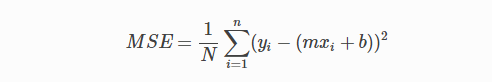


> To minimize the cost (MSE), we can use Gradient Descent. Below are the gradients of the cost:

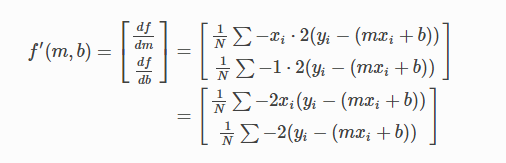



#### Model Assumptions

> Below are Linear Regression model assumptions:

        - Linearity: Dependent variable must be linearly related to independent variable(s)
        - Constant Variance: Variance of error terms should be constant
        - Normal Residuals: Error terms should be normally distributed
        - Independence: Errors are independent 

        



#### Pros and Cons

>Pros

        - Easy to implement and train
        - Susceptible to over fitting, but can be fixed with regularization and dimensionality reduction techniques
>Cons

        - There are model assumptions that need to be met
     
        


### Model Implementation

> Below is an implementation of Simple Linear Regression model on a dataset. 





#### Libraries Used

> A list of libraries used for data visualizations, data preparation, and model building:
    

[Scikit Learn Model Selection - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Numpy](https://numpy.org/)

[Pandas](https://pandas.pydata.org/)

[Matplotlib](https://matplotlib.org/)

[Seaborn](https://seaborn.pydata.org/)

[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

[Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [1]:
#import libraries

from sklearn.model_selection import train_test_split

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import preprocessing

from sklearn.linear_model import LinearRegression

from sklearn import metrics


#### Data Preparation


>Before model building and model implementation, a dataset will be prepared for use. Below, a dataset containing data collected from a Combined Cycle Power Plant is imported. For more information on the dataset, click [here](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant). 

In [2]:
df = pd.read_csv('powerplant.csv')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


> The data is then split into an array containing a feature and an array containing the response. Ambient temperature (AT) is selected as a feature, while the response is Electrical Output.

In [3]:
#features
X = df["AT"].to_numpy()

#response/labels
y = df["PE"].to_numpy()


#### Visualizing the data:

> With the data now mostly prepped, we can visualize the feature and response on a scatter plot. Below, is a scatter plot with ambient temperature and electrical output plotted. There looks to be a linear relationship between the two.

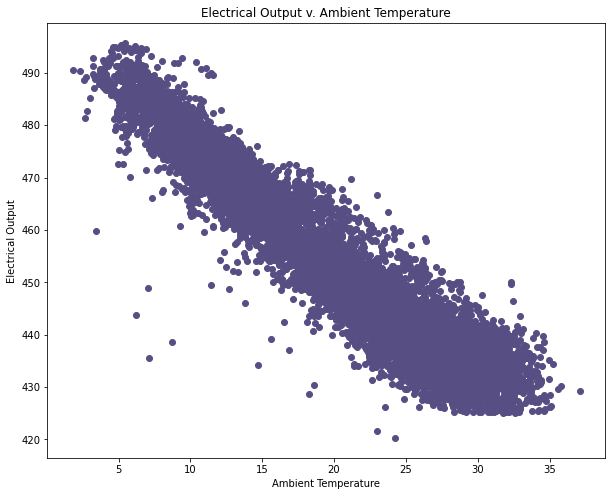

In [4]:
#plot of data

plt.figure(figsize=(10, 8))
plt.scatter(X, y, c = "#574E84")
plt.xlabel("Ambient Temperature")
plt.ylabel("Electrical Output")
plt.title("Electrical Output v. Ambient Temperature")
plt.show()

> Below, the data is divided into train and test sets. The Linear Regression model will first be trained with the data in the training sets and then tested with the data in the test set. Below, 75% of the data will be used to train the model, while 25% of the data will be used to test the model.

In [5]:
#with one feature, x shape is (#,) so I am reshaping
X = X.reshape(len(X), 1)
y = y.reshape(len(y),1)
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

#data is split into test and training sets.
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state = 678)


#### Model Building

> Now that data preparation is complete, we can build the model. Below are the steps:

        - 1. Calculate y_hat
        - 2. Calculate gradients of loss WRT to weights and bias
        - 3. Update weight and bias
        - 4. Repeat process until *n* iterations (epochs)

> Below a class is used to build the model. The steps mentioned above are clearly commented in the code below:
        

In [6]:
class linRegression:
    
    #learning rate and epcohs defaulted to 0.01 and 1000 respectively.
    def __init__(self, lr = 0.01, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        #weight and bias params as None
        self.weights = None
        self.bias = None
          
        
    #Function to train the model.
    def fit(self, X, y):
        
        
        #m = num of observations, n = num of features
        m, n = X.shape    
    
    
        #initialize weights and bias as zeros
        self.weights = np.zeros((n,1))
        self.bias = 0
        
        
        # empty list to store loss/cost
        losses = []
        
        #loop for gradient descent
        for epoch in range(self.epochs):
        
            #Step1:
            #calculating prediction/y_hat
            y_hat = np.dot(X, self.weights) + self.bias
     
            #calculting loss
            loss = np.mean((y_hat - y)**2)
    
            #Appending loss to list: losses
            losses.append(loss)
    
            #Step2:
            #Calculating derivatives of weight and bias parameters
            dw = (1/m)*np.dot(X.T, (y_hat - y))
            db = (1/m)*np.sum((y_hat - y))
            
            #Step3
            #updating weight and bias
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
        
        #return parameters
        return self.weights, self.bias, losses
    
    
    #calculating y_hat with updated weights    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    

#### Using Model on Prepared Data

> Below, the model is trained by passing X_train and y_train to LR_model.fit().  Afterwards, predictions are made by passing X_test to LR_model.predict().

In [7]:
LR_model = linRegression(lr = 0.01, epochs = 15000)

#train model
w, b, l = LR_model.fit(X_train,y_train)

#make predictions
y_hat = LR_model.predict(X_test)

#### Model Evaluation

> Below, we take a look at model accuracy by comparing y and y_hat and calculating R^2.

> Looking at the dataframe containing actual and predicted values for y, the values in the two columns do not differ too much. Also, the model accuracy is 0.90.

In [8]:
# comparing true values to prediction
Compare_df = pd.DataFrame({'Actual':y_test[:,0],'Predicted':y_hat[:,0]})
Compare_df

,Actual,Predicted
0,453.08,448.194517
1,448.67,445.470229
2,441.20,434.019704
3,436.79,430.869745
4,474.87,466.306779
...,...,...
2387,476.06,475.777938
2388,445.52,448.449919
2389,426.15,429.209632
2390,430.87,438.425389


In [9]:
#accuracy
def r2(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

accuracy = r2(y_test[:,0], y_hat[:,0])

print('R squared: {:.2f}'.format(accuracy))

R squared: 0.90


> Below is a plot showing the value of cost at each iteration.

Text(0.5, 1.0, 'Loss V. Iterations')

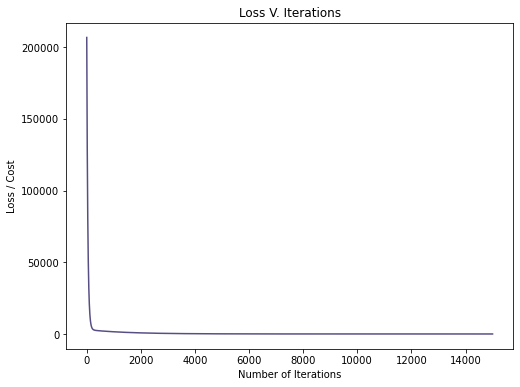

In [10]:
fig = plt.figure(figsize=(8,6))
plt.plot([i for i in range(15000)], l, 'r-', c = '#574E84')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss / Cost')
plt.title("Loss V. Iterations")


### Model Implementation Using Scikit

> Linear Regression can also be implemented using Scikit Learn. Below, I show how this can be done. Below, I will use Scikit learn to build a MLR model to see if I can get a higher accuracy.



#### Libraries Used

> LinearRegression() from Scikit Learn

[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [11]:
#import LogisticRegression

from sklearn.linear_model import LogisticRegression


#### Model Building: Simple Linear Regression
> First, I will build a simple linear regression model using the same features and response as above to see if the model built using Scikit Learn will have a higher accuracy. Below, the model is built using LinearRegression() from Scikit Learn. The model is then trained by passing X_train and y_train to lr.fit() Afterwards, predictions are made by passing X_test to lr.predict().

In [12]:
lr = LinearRegression()  

#train model
lr.fit(X_train, y_train)

#make predictions
y_pred= lr.predict(X_test)

#### Model Evaluation
> Below, we take a look at the Scikit model accuracy by comparing y and y_hat and calculating R^2.

> Looking at the dataframe containing actual and predicted values for y, the values in the two columns do not differ too much. The Scikit model accuracy is 89.89. The Linear Regression model built from scratch and the one built using Scikit Learn have the same accuracy at around 0.89 and 0.90. So, both are about ~90% accurate at predicting y given x.

In [13]:
#compare y and y_hat
ScikitCompare_df = pd.DataFrame({'Actual':y_test[:,0],'Predicted':y_pred[:,0]})
ScikitCompare_df

,Actual,Predicted
0,453.08,448.109648
1,448.67,445.336361
2,441.20,433.679887
3,436.79,430.473274
4,474.87,466.547676
...,...,...
2387,476.06,476.189182
2388,445.52,448.369644
2389,426.15,428.783302
2390,430.87,438.164813


In [14]:
#accuracy
print('R squared: {:.2f}'.format(lr.score(X,y)*100))

R squared: 89.89


#### Model Building:  MLR
> Next, I will use Scikit Learn to the build a MLR model using the same response and additional feature to see if the MLR model built using Scikit Learn will have higher accuracy compared to both simple Linear Regression models.

>Below, data is prepped. I add relative humidity (RH) as a feature.

In [15]:
# #features
X = df[["RH", "AT"]].to_numpy()

#response/labels
y = df["PE"].to_numpy()

#scale x
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

#split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state = 678)


> Below, the model is built using LinearRegression() from Scikit Learn. The model is then trained by passing X_train and y_train to mlr.fit(). Afterwards, predictions are made by passing X_test to mlr.predict().

In [16]:
mlr = LinearRegression()  

#train model
mlr.fit(X_train, y_train)

#make predictions
y_MLRpred= mlr.predict(X_test)

#### Model Evaluation

> Below, we take a look at the Scikit MLR model accuracy by comparing y and y_hat and calculating R^2. 

> The calculated accuracy for the MLR model is slightly better than both of the Simple Linear Regression models at 0.92.

In [17]:
#compare y and y_hat
ScikitCompareMLR_df = pd.DataFrame({'Actual':y_test,'Predicted':y_MLRpred})
ScikitCompareMLR_df


,Actual,Predicted
0,453.08,449.604526
1,448.67,443.108030
2,441.20,434.101317
3,436.79,434.478028
4,474.87,471.658405
...,...,...
2387,476.06,473.421185
2388,445.52,445.010025
2389,426.15,429.709345
2390,430.87,433.065968


In [18]:
print('R squared: {:.2f}'.format(mlr.score(X,y)*100))

R squared: 92.09


#### Conslusion

> The Simple Linear Regression model built from scratch performed about the same as the Simple Linear Regression model built using Scikit Learn, both with a R2 of about 0.90. The MLR model built using Scikit learn out performed both Simple Linear Regression models since it has a slightly higher R2 of 0.92. This suggests that electrical output is not dependent on ambient temperature alone.